# Comparando, Tratando e Mesclando DataFrames

## Objetivo

Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas análises ficarem mais intuitivas futuramente. Para isso, vamos criar um data frame com todos os detalhes.

- Usaremos o método merge para isso e, depois se quisermos, podemos pegar apenas as colunas que queremos do dataframe final.

### Criando nossos dataframes

In [ ]:
import pandas as pd
#às vezes precisaremos mudar o encoding. Possiveis valores para testar:
#encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';', encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';', encoding='ISO-8859-1')
promocoes_df = pd.read_csv(r'Contoso - Promocoes.csv', sep=';', encoding='ISO-8859-1')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';', encoding='ISO-8859-1')


#usaremos o display para ver todos os dataframes
display(vendas_df)
display(clientes_df)
display(lojas_df)
display(promocoes_df)
display(produtos_df)

pd.Series()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ID Promocao,Nome Promocao,Percentual Desconto,Data Inicio,Data Termino
0,1,Sem desconto,0,01/01/2017,31/12/2020
1,2,Promoção de Primavera Americana,"0,05",01/01/2017,31/03/2017
2,3,Promoção Volta às Aulas Americanas,"0,1",01/07/2017,30/09/2017
3,4,Promoção Férias Escolares Americanas,"0,2",01/11/2017,31/12/2017
4,5,Promoção Férias Asiáticas,"0,15",01/11/2017,31/01/2018
5,6,Promoção de Primavera Asiática,"0,2",01/02/2017,30/04/2017
6,7,Promoção de Verão Asiático,"0,1",01/05/2017,30/06/2017
7,8,Promoção de Primavera Europeia,"0,07",01/02/2017,30/04/2017
8,9,Promoção Volta às Aulas Europeias,"0,1",01/08/2017,30/09/2017
9,10,Promoção de Férias Europeias,"0,2",01/10/2017,31/01/2018


,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


### Vamos tirar as colunas inúteis do clientes_df ou pegar apenas as colunas que quisermos

In [23]:
testing_drop = clientes_df.drop(columns=['Primeiro Nome','Sobrenome'])
display(testing_drop)

clientes_df_clean = clientes_df[['ID Cliente', 'E-mail']]
lojas_df_clean = lojas_df[['ID Loja', 'Nome da Loja']]
promocoes_df_clean = promocoes_df[['ID Promocao', 'Percentual Desconto']]
produtos_df_clean = produtos_df[['ID Produto', 'Nome do Produto']]

display(clientes_df_clean)
display(lojas_df_clean)
display(promocoes_df_clean)
display(produtos_df_clean)

,ID Cliente,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...
39499,39500,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,shawn23@adventure-works.com,Masculino,1,29/03/2001


,ID Cliente,E-mail
0,1,glanfranchi0@mayoclinic.com
1,2,lroseblade1@bigcartel.com
2,3,gishchenko2@moonfruit.com
3,4,bjedrzejewsky3@e-recht24.de
4,5,sbredbury4@sitemeter.com
...,...,...
39499,39500,brandy0@adventure-works.com
39500,39501,alicia12@adventure-works.com
39501,39502,connie4@adventure-works.com
39502,39503,shawn23@adventure-works.com


,ID Loja,Nome da Loja
0,1,Loja Contoso Seattle No.1
1,2,Loja Contoso Seattle No.2
2,3,Loja Contoso Kennewick
3,4,Loja Contoso Bellevue
4,5,Loja Contoso Redmond
...,...,...
301,306,Loja Contoso Europe Online
302,307,Loja Contoso Asia Online
303,308,Loja Contoso North America Reseller
304,309,Loja Contoso Europe Reseller


,ID Promocao,Percentual Desconto
0,1,0
1,2,"0,05"
2,3,"0,1"
3,4,"0,2"
4,5,"0,15"
5,6,"0,2"
6,7,"0,1"
7,8,"0,07"
8,9,"0,1"
9,10,"0,2"


,ID Produto,Nome do Produto
0,873,Contoso Wireless Laser Mouse E50 Grey
1,879,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey
2,880,Contoso Optical Wheel OEM PS/2 Mouse E60 Black
3,881,Contoso Optical Wheel OEM PS/2 Mouse E60 White
4,882,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver
...,...,...
1685,1602,SV DVD 12-Inch Player Portable M400 Black
1686,1606,SV DVD 9-Inch Player Portable M300 Silver
1687,1607,SV DVD 12-Inch Player Portable M400 Silver
1688,1611,SV DVD 9-Inch Player Portable M300 White


### Agora vamos juntar os dataframes para ter 1 único dataframe com tudo "bonito"

- Obs: O merge precisa das colunas com o mesmo nome para funcionar. Se não tiver, você precisa alterar o nome da coluna com o .rename

In [24]:
#juntando os dataframes
Informacoes_vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')
Informacoes_vendas_df = Informacoes_vendas_df.merge(produtos_df, on='ID Produto')
Informacoes_vendas_df = Informacoes_vendas_df.merge(lojas_df, on='ID Loja')

#exibindo o dataframe final
display(Informacoes_vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,...,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Subcategoria,Nome da Loja,Quantidade Colaboradores,País
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,...,"Digital camera, product type digital camera, d...",A. Datum Corporation,A. Datum,Regular,"86,68","188,5",23,Loja Contoso Austin,25.0,Estados Unidos
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,...,Store your CDs or DVDs in these beautiful bind...,Southridge Video,Southridge Video,Regular,"5,82","12,66",35,Loja Contoso North America Reseller,15.0,Estados Unidos
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,...,"Bluetooth stereo music streaming, Micro SD exp...",The Phone Company,The Phone Company,Regular,"105,77",230,31,Loja Contoso Tehran No.2,95.0,Irã
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,...,"Up to 288 hours (12 days) of standby time, wha...","Contoso, Ltd",Contoso,Econômico,"86,91",189,31,Loja Contoso Singapore,27.0,Singapura
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,...,"Digital camera  SLR, 5.2 in x 2.8 in x 3.7 in...","Contoso, Ltd",Contoso,Econômico,"148,08",322,24,Loja Contoso Grand Prairie,25.0,Estados Unidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,...,Rubberized exterior provides a sure grip on th...,"Contoso, Ltd",Contoso,Econômico,"7,64","14,99",33,Loja Contoso Ridgely,25.0,Estados Unidos
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,...,Rubberized exterior provides a sure grip on th...,"Contoso, Ltd",Contoso,Econômico,"7,64","14,99",33,Loja Contoso Milliken,25.0,Estados Unidos
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,...,Stay in touch longer by getting battery power ...,"Contoso, Ltd",Contoso,Econômico,"2,07","4,06",33,Loja Contoso Cheshire,NaN,Reino Unido
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,...,"1.80GHz dual processor, 1GB DDR2 memory, 320GB...",Adventure Works,Adventure Works,Regular,"188,13",369,17,Loja Contoso East Troy,22.0,Estados Unidos


### vamos renomear o e-mail para ficar claro que é do cliente

In [25]:
# vamos renomear o e-mail para ficar claro que é do cliente
Informacoes_vendas_df = Informacoes_vendas_df.rename(columns={'E-mail':'E-mail Cliente'})
display(Informacoes_vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,...,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Subcategoria,Nome da Loja,Quantidade Colaboradores,País
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,...,"Digital camera, product type digital camera, d...",A. Datum Corporation,A. Datum,Regular,"86,68","188,5",23,Loja Contoso Austin,25.0,Estados Unidos
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,...,Store your CDs or DVDs in these beautiful bind...,Southridge Video,Southridge Video,Regular,"5,82","12,66",35,Loja Contoso North America Reseller,15.0,Estados Unidos
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,...,"Bluetooth stereo music streaming, Micro SD exp...",The Phone Company,The Phone Company,Regular,"105,77",230,31,Loja Contoso Tehran No.2,95.0,Irã
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,...,"Up to 288 hours (12 days) of standby time, wha...","Contoso, Ltd",Contoso,Econômico,"86,91",189,31,Loja Contoso Singapore,27.0,Singapura
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,...,"Digital camera  SLR, 5.2 in x 2.8 in x 3.7 in...","Contoso, Ltd",Contoso,Econômico,"148,08",322,24,Loja Contoso Grand Prairie,25.0,Estados Unidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,...,Rubberized exterior provides a sure grip on th...,"Contoso, Ltd",Contoso,Econômico,"7,64","14,99",33,Loja Contoso Ridgely,25.0,Estados Unidos
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,...,Rubberized exterior provides a sure grip on th...,"Contoso, Ltd",Contoso,Econômico,"7,64","14,99",33,Loja Contoso Milliken,25.0,Estados Unidos
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,...,Stay in touch longer by getting battery power ...,"Contoso, Ltd",Contoso,Econômico,"2,07","4,06",33,Loja Contoso Cheshire,NaN,Reino Unido
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,...,"1.80GHz dual processor, 1GB DDR2 memory, 320GB...",Adventure Works,Adventure Works,Regular,"188,13",369,17,Loja Contoso East Troy,22.0,Estados Unidos


### Agora podemos começar as análises

E-mail Cliente
karen33@adventure-works.com      77
chloe77@adventure-works.com      74
julia43@adventure-works.com      69
gilbert9@adventure-works.com     68
destiny66@adventure-works.com    68
                                 ..
mblemen9o@ebay.com                1
rebecca15@adventure-works.com     1
kevin10@adventure-works.com       1
siliffe8l@spotify.com             1
clifford8@adventure-works.com     1
Name: count, Length: 38907, dtype: int64

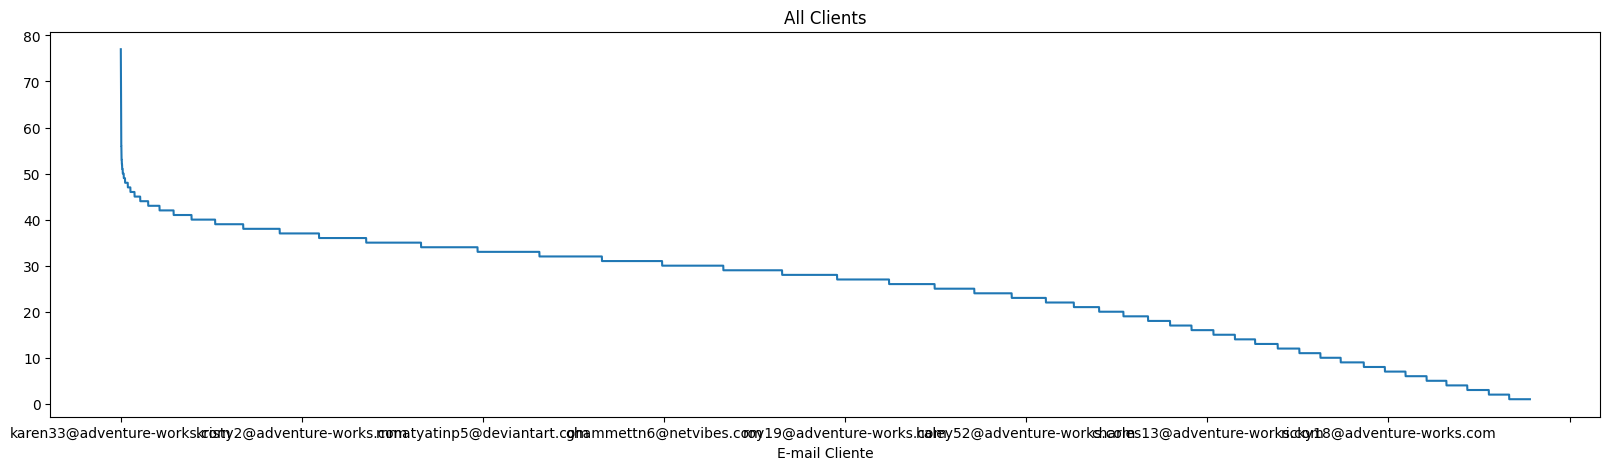

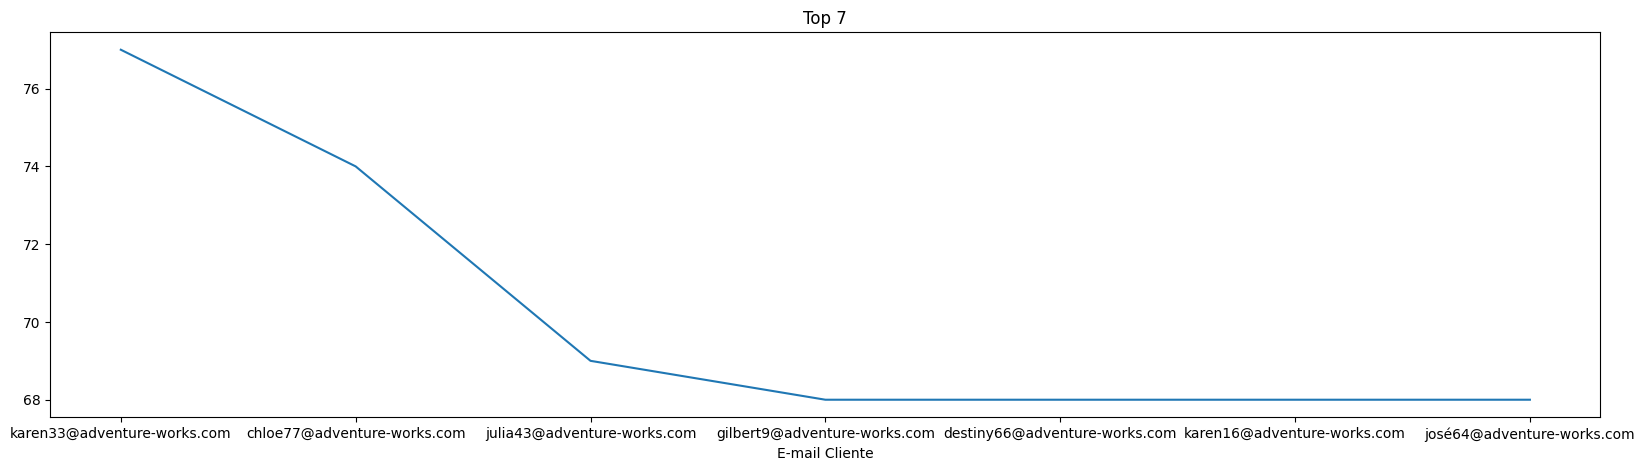

In [26]:
frequencia_clientes = Informacoes_vendas_df['E-mail Cliente'].value_counts()
display(frequencia_clientes)

# Showing all clients
#frequencia_clientes.plot(figsize=(20,5))

# showing the 7 clients that bought the most often
# frequencia_clientes[:7].plot(figsize=(20,5), xticks=(range(7)))

# Showing both at same time
import matplotlib.pyplot as plt

# Create your data
df1 = frequencia_clientes
df2 = frequencia_clientes[:7]

# Plot the first DataFrame in the first figure
plt.figure()
df1.plot(figsize=(20,5))
plt.title('All Clients')

# Plot the second DataFrame in the second figure
plt.figure()
df2.plot(figsize=(20,5), xticks=(range(7)))
plt.title('Top 7')

plt.show()

### To find the total amount of sales per store

In [27]:
# To find the total amount of sales per store
# This might take 1-2 min
Soma_Por_lojas = Informacoes_vendas_df.groupby('Nome da Loja').sum()
display(Soma_Por_lojas)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,...,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Subcategoria,Quantidade Colaboradores,País
Nome da Loja,,,,,,,,,,,,,,,,,,,,,
Loja Contoso Albany,1202431493,01/01/201701/01/201701/01/201701/01/201701/01/...,06/01/201701/01/201701/01/201701/01/201701/01/...,5537,279756,2256167,5099,48257399,26353,298,...,Contoso Notebook Peripheral Kit M69 WhiteA. Da...,It acts as a convenient carrier for an include...,"Contoso, LtdA. Datum CorporationAdventure Work...",ContosoA. DatumAdventure WorksThe Phone Compan...,RegularRegularRegularRegularEconômicoEconômico...,"7,59155,43254,86105,77112,1470,8712,74166,2157...","16,5338499,9230219,9513924,99326309219,9532611...",54843,115338.0,Estados UnidosEstados UnidosEstados UnidosEsta...
Loja Contoso Alexandria,1180450098,01/01/201701/01/201701/01/201701/01/201701/01/...,01/01/201711/01/201708/01/201707/01/201709/01/...,5336,449696,2254764,5041,48586319,26247,326,...,Litware Home Theater System 5.1 Channel M515 B...,"1000 watts over 5 channels, 5 disc DVD/CD chan...","Litware, Inc.Contoso, LtdContoso, LtdProseware...",LitwareContosoContosoProsewareContosoThe Phone...,RegularEconômicoRegularRegularEconômicoEconômi...,"261,66152,4420,1587,376,0791,9713,3355,6468,06...","56929943,8119011,920028,9912114891391,924827,9...",54850,53768.0,Estados UnidosEstados UnidosEstados UnidosEsta...
Loja Contoso Amsterdam,1463641203,01/01/201701/01/201701/01/201701/01/201701/01/...,05/01/201701/01/201701/01/201705/01/201706/01/...,6295,721440,2855945,21345,58902735,28294,401,...,"A. Datum SLR Camera 35"" M358 GoldContoso 2G MP...",Digital camera - SLR with live view mode2GB fl...,"A. Datum CorporationContoso, LtdContoso, LtdA....",A. DatumContosoContosoA. DatumProsewareProsewa...,RegularEconômicoRegularRegularLuxoRegularEconô...,"155,431113,33207,74827,9790,13112,14132,9254,4...","33821,5728,996272499196219,9528949939913,89588...",68862,78156.0,HolandaHolandaHolandaHolandaHolandaHolandaHola...
Loja Contoso Anchorage,1214566953,01/01/201701/01/201701/01/201701/01/201701/01/...,01/01/201708/01/201705/01/201701/01/201701/01/...,5441,458964,2328863,5252,49081995,27451,361,...,A. Datum Slim Digital Camera M180 BlackA. Datu...,"Digital camera-compact, 3.7 in x 0.9 in x 2.34...",A. Datum CorporationA. Datum CorporationA. Dat...,A. DatumA. DatumA. DatumAdventure WorksProsewa...,EconômicoRegularRegularEconômicoEconômicoRegul...,"68,06155,43155,43137,6324,9810,9914,2891,51254...","148338338269,954923,92819949928975,99992931295...",56508,117876.0,Estados UnidosEstados UnidosEstados UnidosEsta...
Loja Contoso Annapolis,1196644689,01/01/201701/01/201701/01/201701/01/201701/01/...,04/01/201709/01/201701/01/201709/01/201706/01/...,5401,466995,2243342,5131,47511944,26065,300,...,The Phone Company Sharp Touch Screen Phones M9...,"Wherever you are, you can enjoy the high-speed...","The Phone CompanyThe Phone CompanyContoso, Ltd...",The Phone CompanyThe Phone CompanyContosoConto...,RegularRegularEconômicoRegularRegularEconômico...,"138,42117,2714,28167,73155,43111,6587,376,0715...","3012552832933821919011,932859,9931030113699188...",54563,53790.0,Estados UnidosEstados UnidosEstados UnidosEsta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Loja Contoso Yokohama,1277269788,01/01/201701/01/201701/01/201701/01/201701/01/...,01/01/201701/01/201701/01/201701/01/201701/01/...,5423,681377,2331010,10524,50296371,28023,367,...,SV 40GB USB2.0 Portable Hard Disk E400 SilverC...,"Ultra durable 40GB USB portable storage, can w...","Southridge VideoContoso, LtdSouthridge VideoAd...",Southridge VideoContosoSouthridge VideoAdventu...,EconômicoRegularRegularRegularRegularEconômico...,"38,7412,418,27389,2659,32137,146,39142,5650,47...","75,9926,9917,99763,5112926913,8931099229549916...",56852,195041.0,JapãoJapãoJapãoJapãoJa

### Getting the sales

In [60]:
vendas_lojas_1 = Soma_Por_lojas['Quantidade Vendida']
display(vendas_lojas_1)
vendas_lojas_2 = Soma_Por_lojas[['Quantidade Vendida']]
display(vendas_lojas_2)

Nome da Loja
Loja Contoso Albany         26353
Loja Contoso Alexandria     26247
Loja Contoso Amsterdam      28294
Loja Contoso Anchorage      27451
Loja Contoso Annapolis      26065
                            ...  
Loja Contoso Yokohama       28023
Loja Contoso York           27164
Loja Contoso koln No.1      29046
Loja Contoso koln No.2      29650
Loja Contoso obamberg       29336
Name: Quantidade Vendida, Length: 306, dtype: int64

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


### A faster way, that creates a new df while only summing the designed columns

In [28]:
# A faster way, that creates a new df while only summing the designed columns

Soma_Por_lojas_quantidade_vendida = Informacoes_vendas_df.groupby('Nome da Loja').agg({'Quantidade Vendida': 'sum'})
display(Soma_Por_lojas_quantidade_vendida)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


### Sorting the sales and creating a plot

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<Axes: xlabel='Nome da Loja'>

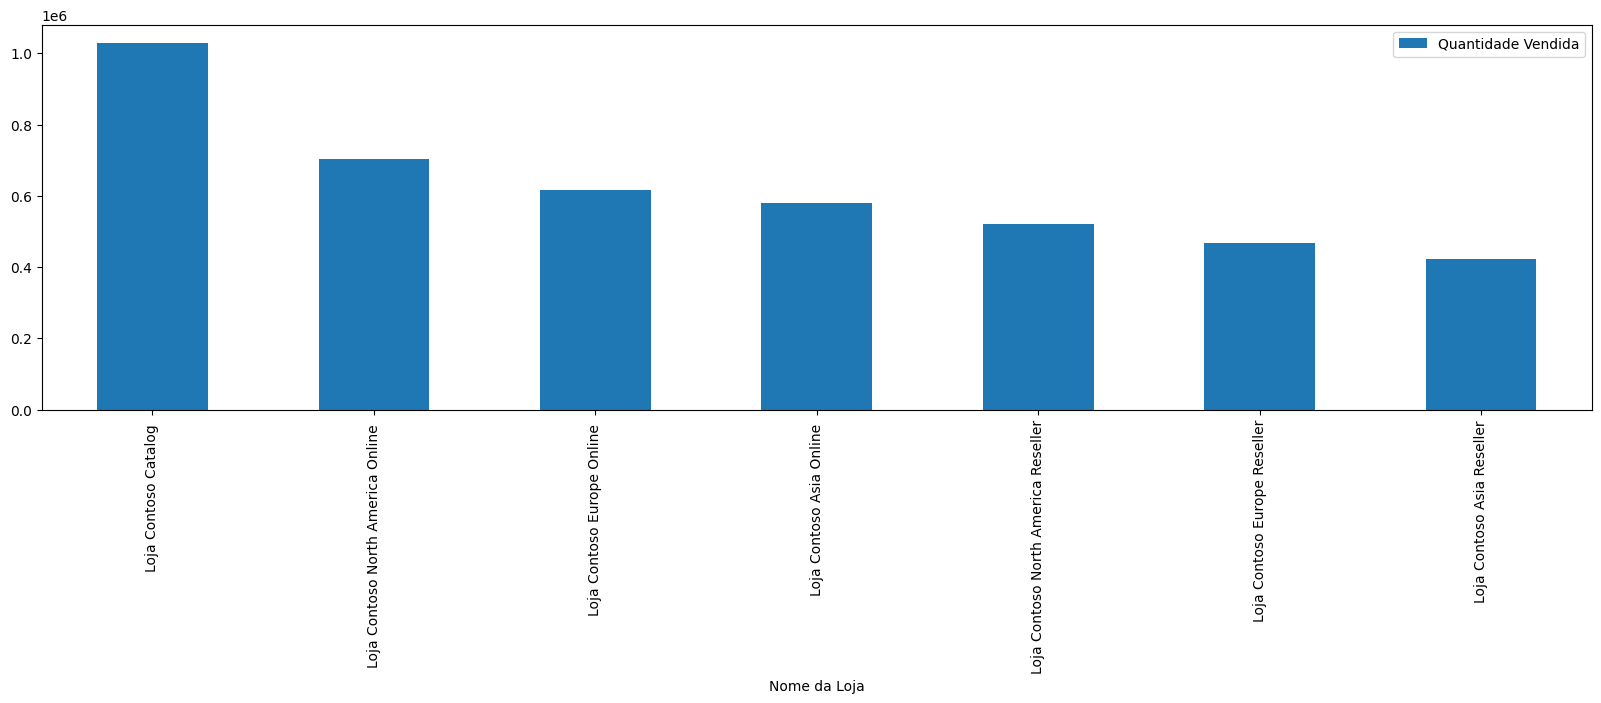

In [30]:
Sort_sales = vendas_lojas_2.sort_values('Quantidade Vendida',ascending=False)
display(Sort_sales)
Sort_sales[:7].plot(figsize=(20,5), kind='bar')

### finding the store that sold the most

In [31]:
# finding the store that sold the most
Sales = Soma_Por_lojas['Quantidade Vendida'].max()
Store = Soma_Por_lojas['Quantidade Vendida'].idxmax()
print(f"The store {Store}, was the one with most sales, selling a total of {Sales} products")

The store Loja Contoso Catalog , was the one with most sales, selling a total of 1029117 products


### finding the store that sold the least

In [32]:
# finding the store that sold the least
Sales = Soma_Por_lojas['Quantidade Vendida'].min()
Store = Soma_Por_lojas['Quantidade Vendida'].idxmin()
print(f"The store {Store}, was the one with least sales, selling a total of {Sales} products")

The store Loja Contoso Venezia , was the one with least sales, selling a total of 234 products


### Or, since we have sort_sales:

In [33]:
# Or, since we have sort_sales:

most = Sort_sales[:1]
#most = Sort_sales['Quantidade Vendida'].idxmax()
#most = Sort_sales.loc[Sort_sales['Quantidade Vendida'].idxmax()]
least = Sort_sales[-1:]

display(most)
display(least)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117


,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234


### let's exam the percentage of devolutions for all stores

In [34]:
# clientes_df_clean 
# lojas_df_clean
# promocoes_df_clean
# produtos_df_clean

# let's exam the percentage of devolutions for all stores
devolution = Informacoes_vendas_df['Quantidade Devolvida'].sum()
sales = Informacoes_vendas_df['Quantidade Vendida'].sum()
print('{:.2%}'.format(devolution / sales))
print(f'{devolution/sales :.2%}')

1.17%
1.17%


### Now let's exam the percentage of devolutions on the store with the most and least sales

In [35]:
# Now let's exam the percentage of devolutions on the store with the most and least sales

most_sales_store = Soma_Por_lojas['Quantidade Vendida'].idxmax()
least_sales_store = Soma_Por_lojas['Quantidade Vendida'].idxmin()

most_sales_info = Soma_Por_lojas.loc[most_sales_store,['Quantidade Vendida', 'Quantidade Devolvida']]
most_sales = most_sales_info['Quantidade Vendida']
most_sales_devolution = most_sales_info['Quantidade Devolvida']

least_sales_info = Soma_Por_lojas.loc[least_sales_store,['Quantidade Vendida', 'Quantidade Devolvida']]
least_sales = least_sales_info['Quantidade Vendida']
least_sales_devolution = least_sales_info['Quantidade Devolvida']

display(most_sales_info)
display(least_sales_info)
print(f'The store {most_sales_store} had a percentage of {most_sales_devolution/most_sales :.2%} devolution')
print(f'The store {least_sales_store} had a percentage of {least_sales_devolution/least_sales :.2%} devolution')

Quantidade Vendida      1029117
Quantidade Devolvida       9615
Name: Loja Contoso Catalog , dtype: object

Quantidade Vendida      234
Quantidade Devolvida      6
Name: Loja Contoso Venezia , dtype: object

The store Loja Contoso Catalog  had a percentage of 0.93% devolution
The store Loja Contoso Venezia  had a percentage of 2.56% devolution


### different methods to find a specify store and getting informations for it

In [36]:
# different methods to find a specify store and getting informations for it

query = Informacoes_vendas_df[Informacoes_vendas_df['ID Loja'] == 306]
# display(query)

query = Informacoes_vendas_df.query('`ID Loja` == 306')
# display(query)

query = Informacoes_vendas_df.loc[Informacoes_vendas_df['ID Loja'] == 306]
# display(query)

query_sales = query['Quantidade Vendida'].sum()
query_devolution = query['Quantidade Devolvida'].sum()
query_name = query.iloc[0]['Nome da Loja']

display(query_name)
print(f'The store {query_name} had a percentage of {query_devolution/query_sales :.2%} devolution')

'Loja Contoso Europe Online '

The store Loja Contoso Europe Online  had a percentage of 1.33% devolution


### different methods to find a specific store while only counting it's sales that didn't have devolution

In [49]:
# different methods to find a specific store while only counting it's sales that didn't have devolution
sales_without_devolution =Informacoes_vendas_df['Quantidade Devolvida'] == 0
store_306 = Informacoes_vendas_df['ID Loja'] == 306

query = Informacoes_vendas_df[ store_306 & sales_without_devolution]
# display(query)

query = Informacoes_vendas_df.query('`ID Loja` == 306' and '`Quantidade Devolvida` == 0')
# display(query)

query = Informacoes_vendas_df.loc[sales_without_devolution & store_306]
#display(query)

query_sales = query['Quantidade Vendida'].sum()
query_devolution = query['Quantidade Devolvida'].sum()
 
query_name_1 = query.iloc[0,24] # .iloc is integer based, getting the n-th element from the Dataframe, works akin to getting a element form a list based on it's position
query_name_2 = query.loc[98,'Nome da Loja'] # .loc is label based, gets the element with the index 98 (or with a certain name if the index are names and not numbers) and the column with the name 'Nome da loja

# The methods below also works, but are depreciated. That happens because we are not going straight to the element on the position [x,y]
# but rather getting the row [x] and then looking at the column [y]
depreciated_query_name = query.iloc[0][24]
depreciated_query_name_1 = query.iloc[0]['Nome da Loja']
depreciated_query_name_2 = query.loc[98]['Nome da Loja']
# display(query)

display(query_name_1)
display(query_name_2)
print(f'The store {query_name} had a percentage of {query_devolution/query_sales :.2%} devolution')

C:\Users\jonma\AppData\Local\Temp\ipykernel_28256\307424934.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  depreciated_query_name = query.iloc[0][24]


'Loja Contoso Europe Online '

'Loja Contoso Europe Online '

The store Loja Contoso Europe Online  had a percentage of 0.00% devolution


### Modifying the type of a column and creating new ones.

In [46]:
# Modifying the type of a column and creating new ones.

Informacoes_vendas_df.info()
Informacoes_vendas_df['Data da Venda'] = pd.to_datetime(Informacoes_vendas_df['Data da Venda'],format='%d/%m/%Y')
Informacoes_vendas_df['Data do Envio'] = pd.to_datetime(Informacoes_vendas_df['Data do Envio'],format='%d/%m/%Y')
Informacoes_vendas_df['Data de Nascimento'] = pd.to_datetime(Informacoes_vendas_df['Data de Nascimento'],format='%d/%m/%Y')

# creating a new column works akin to a dictionary, it that column doesn't exist, it's created
Informacoes_vendas_df['Dia da Venda'] = Informacoes_vendas_df['Data da Venda'].dt.day
Informacoes_vendas_df['Mes da Venda'] = Informacoes_vendas_df['Data da Venda'].dt.month
Informacoes_vendas_df['Ano da Venda'] = Informacoes_vendas_df['Data da Venda'].dt.year
Informacoes_vendas_df.info()
# display(Informacoes_vendas_df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Numero da Venda           980642 non-null  int64         
 1   Data da Venda             980642 non-null  datetime64[ns]
 2   Data do Envio             980642 non-null  datetime64[ns]
 3   ID Canal                  980642 non-null  int64         
 4   ID Loja                   980642 non-null  int64         
 5   ID Produto                980642 non-null  int64         
 6   ID Promocao               980642 non-null  int64         
 7   ID Cliente                980642 non-null  int64         
 8   Quantidade Vendida        980642 non-null  int64         
 9   Quantidade Devolvida      980642 non-null  int64         
 10  Primeiro Nome             980642 non-null  object        
 11  Sobrenome                 980642 non-null  object        
 12  E-

### modifying the value of an element

In [51]:
# modifying the value of an element
display(produtos_df)
new_products_df = produtos_df
new_products_df.loc[0,'Custo Unitario'] = 13
display(new_products_df)

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,13,"20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


### exporting a data frame as csv

In [54]:
# exporting a data frame as csv
# the defaul sep is ',' since csv stands for comma separated values, just set it here to remember we can define what the separator is
# Informacoes_vendas_df.to_csv(r'sales_information.csv', sep=',')

### Turning a dictionary into a Data frama

In [59]:
# Turning a dictionary into a Data frama
vendas_produtos = {'iphone': [558147, 951642], 'galaxy': [712350, 244295], 'ipad': [573823, 26964], 'tv': [405252, 787604], 'máquina de café': [718654, 867660], 'kindle': [531580, 78830], 'geladeira': [973139, 710331], 'adega': [892292, 646016], 'notebook dell': [422760, 694913], 'notebook hp': [154753, 539704], 'notebook asus': [887061, 324831], 'microsoft surface': [438508, 667179], 'webcam': [237467, 295633], 'caixa de som': [489705, 725316], 'microfone': [328311, 644622], 'câmera canon': [591120, 994303]}
sales_product_df = pd.DataFrame.from_dict(vendas_produtos)
# The default is to use keys as columns
display(sales_product_df)
# To use them as line instead
sales_product_df = pd.DataFrame.from_dict(vendas_produtos, orient='index')
display(sales_product_df)
# Since the index doesn't have a name, it's defaulted to numbers
# in order to rename them. Notice that the columns in this case are ints, not a string of a int
    # sales_product_df = sales_product_df.rename(columns={0:'0', 1:'1'})
    # display(sales_product_df)
    #sales_product_df = sales_product_df.rename(columns={'0':'Sales 2019', '1':'Sales 2020'})

sales_product_df = sales_product_df.rename(columns={0:'Sales 2019', 1:'Sales 2020'})
display(sales_product_df)
# Since the name of some of the columns have special character (café, câmera) we should use a proper encoder if we want our file to preservate the names
# sales_product_df.to_csv(r'sales_information.csv', encoding='latin1')

,iphone,galaxy,ipad,tv,máquina de café,kindle,geladeira,adega,notebook dell,notebook hp,notebook asus,microsoft surface,webcam,caixa de som,microfone,câmera canon
0,558147,712350,573823,405252,718654,531580,973139,892292,422760,154753,887061,438508,237467,489705,328311,591120
1,951642,244295,26964,787604,867660,78830,710331,646016,694913,539704,324831,667179,295633,725316,644622,994303


,0,1
iphone,558147,951642
galaxy,712350,244295
ipad,573823,26964
tv,405252,787604
máquina de café,718654,867660
kindle,531580,78830
geladeira,973139,710331
adega,892292,646016
notebook dell,422760,694913
notebook hp,154753,539704


,Sales 2019,Sales 2020
iphone,558147,951642
galaxy,712350,244295
ipad,573823,26964
tv,405252,787604
máquina de café,718654,867660
kindle,531580,78830
geladeira,973139,710331
adega,892292,646016
notebook dell,422760,694913
notebook hp,154753,539704


### It's Possible to create a dataframe from a list of dictionary or a Dictionary of lists 

In [ ]:
# It's possible to to create Dfs using dictionaries as rows, by using a list of dictionaries
data = [
    {'Name': 'Alice', 'Age': 25},
    {'Name': 'Bob', 'Age': 30}
]
df = pd.DataFrame(data)
display(df)

# or as columns, by using a dictionary of list
data = {
    'Name': ['Alice', 'Bob'],
    'Age': [25, 30]
}
df = pd.DataFrame(data)
display(df)

# pandas lendo csv da internet

### Essa é uma das formas de importar arquivos da internet, direto do pandas. Mas nem sempre você vai conseguir abrir assim direto.

### 2 situações principais em que você consegue fazer direto

1. Arquivo csv direto no link (melhor dos mundos)
2. O arquivo csv é gerado para você, mas fica no meio de uma requisição que precisa ser tratada.

### Caso 1: csv direto no link

- Criei um arquivo csv e disponibilizei o link para download no Drive: https://drive.google.com/uc?authuser=0&id=1Ru7s-x3YJuStZK1mqr_qNqiHVvdHUN66&export=download

In [ ]:
import pandas as pd

url = 'https://drive.google.com/uc?authuser=0&id=1Ru7s-x3YJuStZK1mqr_qNqiHVvdHUN66&export=download'
cotacao_df = pd.read_csv(url)
display(cotacao_df)

### Caso 2: csv em uma requisição que precisa ser tratada

Pesquisei por histórico de preços do café no Google e cheguei nesse site: https://portalweb.cooxupe.com.br:9080/portal/precohistoricocafe_2.jsp

In [ ]:
import pandas as pd
import requests
import io

url = 'https://portalweb.cooxupe.com.br:9080/portal/precohistoricocafe_2.jsp?d-3496238-e=2&6578706f7274=1'
conteudo_url = requests.get(url).content
arquivo = io.StringIO(conteudo_url.decode('latin1'))
cafe_df = pd.read_csv(arquivo, sep=r'\t', engine='python')
display(cafe_df)

### Apenas para lembrar os tipos de encoding principais que vamos usar:

- encoding='latin1'
- encoding='ISO-8859-1'
- encoding='utf-8'
- encoding='cp1252'